# **Spaceship Titanic**
**Predict which passengers are transported to an alternate dimension**

# **LOAD THE DATA**

In [23]:
import pandas as pd
import numpy as np


In [24]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **DATA PREPROCESSING**

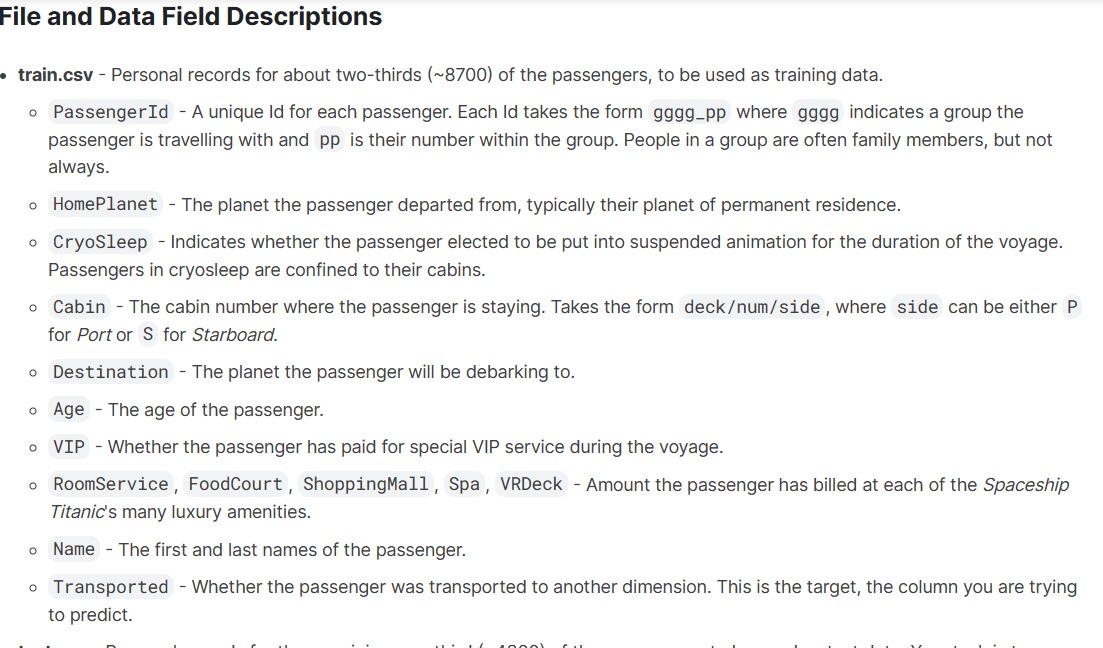

In [25]:
data.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [26]:
data=data.drop(columns = ['PassengerId','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name',])

In [27]:
def block(cabin):
  blo = list(str(cabin).split('/'))
  return blo[0]
data['Cabin'] = data['Cabin'].apply(block)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,True


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Cabin        8693 non-null   object 
 3   Destination  8511 non-null   object 
 4   Age          8514 non-null   float64
 5   VIP          8490 non-null   object 
 6   Transported  8693 non-null   bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 416.1+ KB


In [29]:
data.isnull().sum()

HomePlanet     201
CryoSleep      217
Cabin            0
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [30]:
categorical = data.select_dtypes(include=['object'] ).columns
numeric = data._get_numeric_data().columns

In [32]:
for col in categorical:
  data[col].fillna(data[col].mode()[0],inplace = True)
data['Age'].fillna(data['Age'].mean(),inplace = True)
data.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [33]:
for col in data.columns:
  print(data[col].unique(),data[col].dtype)

['Europa' 'Earth' 'Mars'] object
[False  True] bool
['B' 'F' 'A' 'G' 'nan' 'E' 'D' 'C' 'T'] object
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e'] object
[39.         24.         58.         33.         16.         44.
 26.         28.         35.         14.         34.         45.
 32.         48.         31.         27.          0.          1.
 49.         29.         10.          7.         21.         62.
 15.         43.         47.          2.         20.         23.
 30.         17.         55.          4.         19.         56.
 28.82793047 25.         38.         36.         22.         18.
 42.         37.         13.          8.         40.          3.
 54.          9.          6.         64.         67.         61.
 50.         41.         57.         11.         52.         51.
 46.         60.         63.         59.          5.         79.
 68.         74.         12.         53.         65.         71.
 75.         70.         76.         78.         73.         66.
 69

In [34]:
for col in categorical:
  for i, col in enumerate(sorted(data[col].unique())):
     data.replace(col,i,inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   int64  
 1   CryoSleep    8693 non-null   int64  
 2   Cabin        8693 non-null   int64  
 3   Destination  8693 non-null   int64  
 4   Age          8693 non-null   float64
 5   VIP          8693 non-null   int64  
 6   Transported  8693 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 475.5 KB


In [36]:
data.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,1,0,1,2,39.0,0,0
1,0,0,5,2,24.0,0,1
2,1,0,0,2,58.0,1,0
3,1,0,0,2,33.0,0,0
4,0,0,5,2,16.0,0,1
5,0,0,5,1,44.0,0,1
6,0,0,5,2,26.0,0,1
7,0,1,6,2,28.0,0,1
8,0,0,5,2,35.0,0,1
9,1,1,1,0,14.0,0,1


In [37]:
x = data.drop(columns='Transported')
y = data['Transported']

# **MODEL SELECTION AND MODEL TRAINING**

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.25)
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
print(model.score(xtest,ytest))

0.6904323827046918


In [39]:
import sklearn

parameters = {"n_estimators":[100,200,300,400],"max_depth": [3]}

grid_search = sklearn.model_selection.GridSearchCV(model, parameters, scoring="accuracy")

grid_search.fit(xtrain, ytrain)

best_model = grid_search.best_estimator_

print(best_model)
best_accuracy = grid_search.best_score_
print("Best Accuracy:", best_accuracy)

RandomForestClassifier(max_depth=3, n_estimators=400)
Best Accuracy: 0.7409104285061845


In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.6867525298988041


In [41]:
import sklearn.linear_model

lg = sklearn.linear_model.LogisticRegression()
lg.fit(xtrain,ytrain)
print(lg.score(xtest,ytest))

0.7056117755289788


Finall selected model is RandomForestClassifier(max_depth=3, n_estimators=300)

# **Testing model test data set**

In [42]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')

# **preprocessing the testing data set**

In [43]:
Ids = test['PassengerId']
attributes = ['PassengerId','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name']
test = test.drop(columns = attributes)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False
2,Europa,True,C/0/S,55 Cancri e,31.0,False
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False


In [44]:
for col in categorical:
  test[col].fillna(test[col].mode()[0],inplace = True)
test['Age'].fillna(test['Age'].mean(),inplace = True)
data.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

In [45]:
def block(cabin):
  blo = list(str(cabin).split('/'))
  return blo[0]
test['Cabin'] = test['Cabin'].apply(block)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,Earth,True,G,TRAPPIST-1e,27.0,False
1,Earth,False,F,TRAPPIST-1e,19.0,False
2,Europa,True,C,55 Cancri e,31.0,False
3,Europa,False,C,TRAPPIST-1e,38.0,False
4,Earth,False,F,TRAPPIST-1e,20.0,False


In [46]:
for col in categorical:
  for i, col in enumerate(sorted(test[col].unique())):
     test.replace(col,i,inplace=True)
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0,1,6,2,27.0,0
1,0,0,5,2,19.0,0
2,1,1,2,0,31.0,0
3,1,0,2,2,38.0,0
4,0,0,5,2,20.0,0


# **Predicting results for test data set**
store the results in ids data frame

In [47]:
prediction = best_model.predict(test)
Ids = pd.DataFrame(Ids)
Ids.insert(1,'Transported',prediction)


In [ ]:
Ids.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [48]:
Ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.0+ KB


In [49]:
Ids['Transported'] = Ids['Transported'].apply(lambda x: True if x == 1 else False)

# **Finall results for test data set predict by the Trained model**

In [50]:
Ids.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [51]:
Ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


# **Save the results to csv file**

In [52]:
Ids.to_csv('/content/drive/MyDrive/results.csv',index = False)